# Imported libraries

In [77]:
#may need to install this  !pip install plotly_express==0.4.0
import plotly.express as px
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import math
from scipy import stats
%matplotlib inline

<h3> Read in the data, store if dataframe

In [78]:
df = pd.read_csv('./data/healthcare-dataset-stroke-data.csv')

# Tidying up the data

Implementing consistent capitalization and replacing underscores  spaces with hyphens in the data.

In [79]:
##convert gender to lowercase
df['gender'] = df['gender'].apply(lambda x: x.lower())

##convert work_type to lowercase ensure consistent spacing 
df['work_type'] = df['work_type'].apply(lambda x: x.lower().replace('_','-'))

##convert residence_type to lowercase
df.rename(columns={'Residence_type':'residence_type'}, inplace=True)
df['residence_type'] = df['residence_type'].apply(lambda x: x.lower())

##convert smoking_status to lowercase ensure consistent spacing 
df['smoking_status'] = df['smoking_status'].apply(lambda x: x.lower().replace(' ', '-'))

<h4> Indexes of the outliers with a bmi above 60 for verification purposes

In [80]:
indexes = [270, 358, 466, 544, 928, 1559, 2128, 2764, 2840, 3825, 4188, 4209, 4838]
for index, i in enumerate(df['bmi']):
    if index in indexes:
        print(i, end=',')

60.9,64.8,60.2,71.9,78.0,66.8,97.6,63.3,61.2,61.6,64.4,92.0,60.9,

<h4> Cap the outliers at a maximum bmi of 60

In [81]:
df['bmi'] = df['bmi'].apply(lambda bmi_value: bmi_value if 12 < bmi_value < 60 else np.nan)

<h4>Preliminary work for binning

In [82]:
##max age of 82, max bin get be set accordingly 
print("The max value in age is : " + str(df['age'].max()))
print("Total number of nulls in age is: " + str(df['age'].isnull().sum())) ##check for null
print("Total number of NAs in age is : " + str(df['age'].isna().sum())) ##check for NAs

The max value in age is : 82.0
Total number of nulls in age is: 0
Total number of NAs in age is : 0


<h2>Unknown_smoking status breakdown

In [83]:
##loop to find the number of unknown smoking entries
unknown_count = 0
##store the indexes of the unknown smoking status entries in case it's needed later
unknown_indexes = []
for index, i in enumerate(df['smoking_status']):
    if(i.lower() == 'unknown'):
        #get index and value 
        #print(index, i)
        unknown_indexes.append(index)
        unknown_count+=1
##get percentage of unknown
unknown_percent = unknown_count/len(df) * 100
unknown_percent = round(unknown_percent,4)
print("\nThe percent of entries with an unknown smoking status is: " + str(unknown_percent) + "% or " +str(unknown_count) + " entries")


The percent of entries with an unknown smoking status is: 30.2153% or 1544 entries


<h2>Checking for non-binary values</h2>
<P>Checked in heart_disease, hypertension, ever_married and stroke. Also converts ever_married to 0/1 instead of yes/no<P>

In [84]:
##check for any non-binary values in heart_disease
non_bin_heart_count = 0
for val in df['heart_disease']:
    if(val != 1 and val != 0):
        print(val)
if(non_bin_heart_count == 0):
    print("No non-binary values found in heart_disease")

##check for any non-binary values in hypertension
non_bin_hypt_count = 0
for val in df['hypertension']:
    if(val != 1 and val != 0):
        print(val)
if(non_bin_hypt_count == 0):
    print("No non-binary values found in hypertension")
    
##converts ever_married to 0/1 if not already done 
if(isinstance(df['ever_married'][0],str)):
    df['ever_married'] = df['ever_married'].str.lower().map({'yes': 1, 'no': 0})

##checks for non-binary values in ever_married
non_bin_married_count = 0
for val in df['ever_married']:
    if(val != 1 and val != 0):
        print(val)
if(non_bin_married_count == 0):
    print("No non-binary values found in ever_married")
    
##check for any non-binary values in stroke
non_bin_stroke_count = 0
for val in df['stroke']:
    if(val != 1 and val != 0):
        print(val)
if(non_bin_stroke_count == 0):
    print("No non-binary values found in stroke")

No non-binary values found in heart_disease
No non-binary values found in hypertension
No non-binary values found in ever_married
No non-binary values found in stroke


# Impute missing BMI values
<P>Replace missing BMI values with the average BMI found in rows with the same age and gender<P>

In [85]:
##get number of nulls in df
df.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
residence_type         0
avg_glucose_level      0
bmi                  218
smoking_status         0
stroke                 0
dtype: int64

In [86]:
df['bmi_raw'] = df['bmi']

df['age'] = df['age'].apply(lambda x : round(x))

m_df = df[df['gender'] == 'male']
f_df = df[df['gender'] == 'female']

m_bmi_avg = m_df.groupby('age')['bmi'].mean()
f_bmi_avg = f_df.groupby('age')['bmi'].mean()
##round to one to fit with other bmi values
m_bmi_avg = round(m_bmi_avg,1)
f_bmi_avg = round(f_bmi_avg,1)

missing_vals = df[df.isnull().any(axis = 1)]

for index, row in missing_vals.iterrows():
    if row['gender'] == 'male':
        df.loc[index,['bmi']] = m_bmi_avg[row['age']]
    else:
        df.loc[index,['bmi']] = f_bmi_avg[row['age']]


In [87]:
df.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
residence_type         0
avg_glucose_level      0
bmi                    0
smoking_status         0
stroke                 0
bmi_raw              218
dtype: int64

<h2>Example of imputed values using the outliers above 60</h2>

In [88]:
indexes = [270, 358, 466, 544, 928, 1559, 2128, 2764, 2840, 3825, 4188, 4209, 4838]
for index, i in enumerate(df['bmi']):
    if index in indexes:
        print(i, end=',')

32.8,33.5,29.1,32.5,27.9,32.3,28.0,26.2,31.5,31.5,27.9,31.8,31.0,

<h2> Equal-width binning implementation</h2>
    <P>Uncomment if you want to use, will not work if equal-size binning has already been implemented
    if you've already applied equal-size, then read in the data-frame again<P>

In [89]:
##define labels and bins using equal width binning
#bins = [0,10,20,30,40,50,60,70,80,90]
#labels=['0-10','10-20','20-30','30-40','40-50','50-60','60-70','70-80','80-90']
##replace all age values with their corresponding bin
#df['age_bin'] = pd.cut(df['age'], bins=bins,labels=labels)

#print("total entires in each bin is:\n", df['age_bin'].value_counts())
#print("\npercentage in each bin is:\n", df['age_bin'].value_counts()/len(df)*100)

<h2> Equal-size binning implementation</h2>


In [90]:
df['age_bin'] = pd.qcut(df['age'], q = 10, precision=1)
print("total entires in each bin is:\n", df['age_bin'].value_counts())
print("\npercentage in each bin is:\n", df['age_bin'].value_counts()/len(df)*100)

total entires in each bin is:
 (57.0, 65.0]    559
(20.0, 30.0]    545
(-0.1, 11.0]    543
(30.0, 38.0]    529
(38.0, 45.0]    519
(51.0, 57.0]    517
(65.0, 75.0]    500
(11.0, 20.0]    482
(75.0, 82.0]    465
(45.0, 51.0]    451
Name: age_bin, dtype: int64

percentage in each bin is:
 (57.0, 65.0]    10.939335
(20.0, 30.0]    10.665362
(-0.1, 11.0]    10.626223
(30.0, 38.0]    10.352250
(38.0, 45.0]    10.156556
(51.0, 57.0]    10.117417
(65.0, 75.0]     9.784736
(11.0, 20.0]     9.432485
(75.0, 82.0]     9.099804
(45.0, 51.0]     8.825832
Name: age_bin, dtype: float64


<h2>Equal-size binning for average-glucose level

In [91]:
##create 10 bins, print values for review
df['avg_glucose_level_bin'] = pd.qcut(df['avg_glucose_level'], q=10, precision=1)
print("total entires in each bin is:\n", df['avg_glucose_level_bin'].value_counts())
print("\npercentage in each bin is:\n", df['avg_glucose_level_bin'].value_counts()/len(df)*100)

total entires in each bin is:
 (108.5, 124.2]    512
(80.0, 85.6]      512
(65.8, 73.8]      512
(192.2, 271.7]    511
(98.9, 108.5]     511
(91.9, 98.9]      511
(55.0, 65.8]      511
(124.2, 192.2]    510
(85.6, 91.9]      510
(73.8, 80.0]      510
Name: avg_glucose_level_bin, dtype: int64

percentage in each bin is:
 (108.5, 124.2]    10.019569
(80.0, 85.6]      10.019569
(65.8, 73.8]      10.019569
(192.2, 271.7]    10.000000
(98.9, 108.5]     10.000000
(91.9, 98.9]      10.000000
(55.0, 65.8]      10.000000
(124.2, 192.2]     9.980431
(85.6, 91.9]       9.980431
(73.8, 80.0]       9.980431
Name: avg_glucose_level_bin, dtype: float64


<h2>Equal-size binning for bmi

In [92]:
df['bmi_bin'] = pd.qcut(df['bmi'], q=10, precision=1)
print("total entries in each bin is:\n", df['bmi_bin'].value_counts())
print("\npercentage in each bin is:\n", df['bmi_bin'].value_counts()/len(df)*100)

total entries in each bin is:
 (12.200000000000001, 19.8]    522
(28.2, 29.9]                  520
(24.7, 26.6]                  519
(34.2, 38.6]                  516
(29.9, 31.8]                  514
(22.6, 24.7]                  510
(38.6, 59.7]                  506
(26.6, 28.2]                  503
(19.8, 22.6]                  503
(31.8, 34.2]                  497
Name: bmi_bin, dtype: int64

percentage in each bin is:
 (12.200000000000001, 19.8]    10.215264
(28.2, 29.9]                  10.176125
(24.7, 26.6]                  10.156556
(34.2, 38.6]                  10.097847
(29.9, 31.8]                  10.058708
(22.6, 24.7]                   9.980431
(38.6, 59.7]                   9.902153
(26.6, 28.2]                   9.843444
(19.8, 22.6]                   9.843444
(31.8, 34.2]                   9.726027
Name: bmi_bin, dtype: float64


<h1>Some information about outliers</h1>
<P>Any outliers after binning the ages will be found only in BMI (the most extreme outliers have already been dealt with) and avg_glucose_level. Both columns have a large amount of outliers, the exact number and percentages of which can be seen below. We have not yet done anything with these outliers, simply identified them<P>

<h2>Graphing the outliers

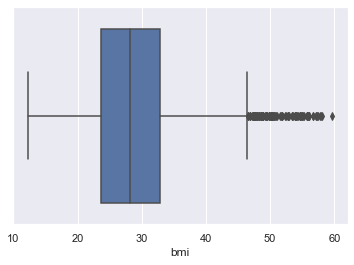

In [93]:
sns.boxplot(x=df['bmi'])

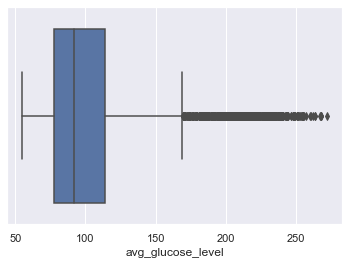

In [94]:
sns.boxplot(x=df['avg_glucose_level'])

<h2>Z-scores to find outliers

<h4>Add in a z-score column to the df

In [95]:
##adds in z-score column to df for bmi and glucose level
cols = ['bmi','avg_glucose_level']
for col in cols:
    col_zscore = col + '_zscore'
    df[col_zscore] = (df[col] - df[col].mean())/df[col].std(ddof=0)
    
df.head()
##count number of outliers


outliers_bmi_z = np.where((df['bmi_zscore']) >=3)
outliers_glu_z = np.where((df['avg_glucose_level_zscore']) >=3)

outliers_bmi_z = 0
for i in df['bmi_zscore']:
    if(i >=3):
        outliers_bmi_z += 1

outliers_glu_z = 0
for i in df['avg_glucose_level_zscore']:
    if(i >=3):
        outliers_glu_z += 1
        
##get outliers as percentage
z_bmi_percent = outliers_bmi_z/len(df)*100
z_glu_percent = outliers_glu_z/len(df)*100

z_bmi_percent = round(z_bmi_percent,2)
z_glu_percent = round(z_glu_percent,2)

print("number of outliers found with z-score for bmi is : "+ str(outliers_bmi_z) + " which is " +str(z_bmi_percent)+"%")
print("number of outliers found with z-score for glucose is : "+ str(outliers_glu_z) + " which is " +str(z_glu_percent)+"%")

##Uncomment below to get indexes of outliers if needed
#print("Indexes where z-score is greater than 3 for bmi below:\n")
#print(np.where((df['bmi_zscore']) >=3))

#print("\n\nIndexes where z-score is greater than 3 for glucose below:\n")
#print(np.where((df['avg_glucose_level_zscore']) >=3))

number of outliers found with z-score for bmi is : 51 which is 1.0%
number of outliers found with z-score for glucose is : 49 which is 0.96%


<h2>IRQ to find outliers

<h4>Avg_glucose_level

In [96]:
##checking for outliers in avg_glucose_level using iqr
q1_glu = df['avg_glucose_level'].quantile(0.25)
q3_glu = df['avg_glucose_level'].quantile(0.75)
iqr_glu = q3_glu-q1_glu
outliers_glu = (df['avg_glucose_level'] < (q1_glu - 1.5 * iqr_glu)) |(df['avg_glucose_level'] > (q3_glu + 1.5 * iqr_glu))
outliers_glu_count = 0
for i in outliers_glu:
    if(i != False):
        outliers_glu_count += 1
        
iqr_glu_percent = outliers_glu_count/len(df)*100
iqr_glu_percent = round(iqr_glu_percent,2)         
print("number of outliers found with iqr for glucose is : "+ str(outliers_glu_count) + " which is " +str(iqr_glu_percent)+"%")

##uncomment to get the indexes of the outliers if needed
#print("\nIndexes where outliers were detected: ")
#print(np.where(outliers_glu != False))

number of outliers found with iqr for glucose is : 627 which is 12.27%


<h4>BMI

In [21]:
##checking for outliers in bmi using iqr
q1_bmi = df['bmi'].quantile(0.25)
q3_bmi = df['bmi'].quantile(0.75)
iqr_bmi = q3_bmi-q1_bmi
outliers_bmi = (df['bmi'] < (q1_bmi - 1.5 * iqr_bmi)) |(df['bmi'] > (q3_bmi + 1.5 * iqr_bmi))

##count number of outliers
outliers_bmi_count = 0
for i in outliers_bmi:
    if(i != False):
        outliers_bmi_count += 1
        
##get outliers as percentage       
iqr_bmi_percent = outliers_bmi_count/len(df)*100
iqr_bmi_percent = round(iqr_bmi_percent,2) 
print("number of outliers found with iqr for bmi is : "+ str(outliers_bmi_count) + " which is " +str(iqr_bmi_percent)+"%")

##uncomment to get the indexes of the outliers if needed
#print("\nIndexes where outliers were detected: ")
#print(np.where(outliers_bmi != False))

number of outliers found with iqr for bmi is : 110 which is 2.15%


In [22]:
df.describe()

id          age  hypertension  heart_disease  ever_married  \
count   5110.000000  5110.000000   5110.000000    5110.000000   5110.000000   
mean   36517.829354    43.226614      0.097456       0.054012      0.656164   
std    21161.721625    22.612731      0.296607       0.226063      0.475034   
min       67.000000     0.000000      0.000000       0.000000      0.000000   
25%    17741.250000    25.000000      0.000000       0.000000      0.000000   
50%    36932.000000    45.000000      0.000000       0.000000      1.000000   
75%    54682.000000    61.000000      0.000000       0.000000      1.000000   
max    72940.000000    82.000000      1.000000       1.000000      1.000000   

       avg_glucose_level          bmi       stroke      bmi_raw    bmi_zscore  \
count        5110.000000  5110.000000  5110.000000  4892.000000  5.110000e+03   
mean          106.147677    28.827436     0.048728    28.799714 -3.003468e-16   
std            45.283560     7.416649     0.215320     7.541793  1.000098e+00   
min            55.120000    12.300000     0.000000    12.300000 -2.228642e+00   
25%            77.245000    23.700000     0.000000    23.500000 -6.914090e-01   
50%            91.885000    28.200000     0.000000    28.000000 -8.460664e-02   
75%           114.090000    32.800000     0.000000    33.000000  5.356802e-01   
max           271.740000    59.700000     1.000000    59.700000  4.163010e+00   

       avg_glucose_level_zscore  
count              5.110000e+03  
mean               1.001156e-16  
std                1.000098e+00  
min               -1.126958e+00  
25%               -6.383223e-01  
50%               -3.149945e-01  
75%                1.754080e-01  
max                3.657145e+00

In [23]:
corr_bmi_stroke_spearman = df['bmi'].corr(df['stroke'], method='spearman')
print("spearman's corr for bmi/stroke: ", corr_bmi_stroke_spearman)

corr_bmi_heart_disease_spearman = df['bmi'].corr(df['stroke'], method='spearman')
print("spearman's corr for bmi/heart disease: ", corr_bmi_heart_disease_spearman)

corr_bmi_hypertension_spearman = df['bmi'].corr(df['hypertension'], method='spearman')
print("spearman's corr for bmi/hypertension: ", corr_bmi_hypertension_spearman)

corr_bmi_glucose_spearman = df['bmi'].corr(df['avg_glucose_level'], method='spearman')
print("spearman's corr for bmi/glucose level: ", corr_bmi_glucose_spearman)

corr_bmi_age_spearman = df['bmi'].corr(df['age'], method='spearman')
print("spearman's corr for bmi/age: ", corr_bmi_age_spearman)
print("\n")

corr_bmi_stroke_pearson = df['bmi'].corr(df['stroke'], method='pearson')
print("pearson's corr for bmi/stroke: ", corr_bmi_stroke_pearson)

corr_bmi_heart_disease_pearson = df['bmi'].corr(df['stroke'], method='pearson')
print("pearson's corr for bmi/heart disease: ", corr_bmi_heart_disease_pearson)

corr_bmi_hypertension_pearson = df['bmi'].corr(df['hypertension'], method='pearson')
print("pearson's corr for bmi/hypertension: ", corr_bmi_hypertension_pearson)

corr_bmi_glucose_pearson = df['bmi'].corr(df['avg_glucose_level'], method='pearson')
print("pearson's corr for bmi/glucose level: ", corr_bmi_glucose_pearson)

corr_bmi_age_pearson = df['bmi'].corr(df['age'], method='pearson')
print("pearson's corr for bmi/age: ", corr_bmi_age_pearson)


spearman's corr for bmi/stroke:  0.05855895551806585
spearman's corr for bmi/heart disease:  0.05855895551806585
spearman's corr for bmi/hypertension:  0.165169708526942
spearman's corr for bmi/glucose level:  0.11761086562324173
spearman's corr for bmi/age:  0.37438637536009417


pearson's corr for bmi/stroke:  0.045970863914884835
pearson's corr for bmi/heart disease:  0.045970863914884835
pearson's corr for bmi/hypertension:  0.15435083603175304
pearson's corr for bmi/glucose level:  0.1818797607890085
pearson's corr for bmi/age:  0.3513218942147936


In [24]:
corr_stroke_heart_disease_spearman = df['stroke'].corr(df['heart_disease'], method='spearman')
print("spearman's corr for stroke/heart disease: ", corr_stroke_heart_disease_spearman)

corr_stroke_glucose_spearman = df['stroke'].corr(df['avg_glucose_level'], method='spearman')
print("spearman's corr for stroke/glucose: ", corr_stroke_glucose_spearman)

corr_stroke_hypertension_spearman = df['stroke'].corr(df['hypertension'], method='spearman')
print("spearman's corr for stroke/hypertension: ", corr_stroke_hypertension_spearman)

corr_stroke_age_spearman = df['stroke'].corr(df['age'], method='spearman')
print("spearman's corr for stroke/age: ", corr_stroke_age_spearman)

print("\n")

corr_stroke_heart_disease_pearson = df['stroke'].corr(df['heart_disease'], method='pearson')
print("pearson's corr for stroke/heart disease: ", corr_stroke_heart_disease_pearson)

corr_stroke_glucose_pearson = df['stroke'].corr(df['avg_glucose_level'], method='pearson')
print("pearson's corr for stroke/glucose: ", corr_stroke_glucose_pearson)

corr_stroke_hypertension_pearson = df['stroke'].corr(df['hypertension'], method='pearson')
print("pearson's corr for stroke/hypertension: ", corr_stroke_hypertension_pearson)

corr_stroke_age_pearson = df['stroke'].corr(df['age'], method='pearson')
print("pearson's corr for stroke/age: ", corr_stroke_age_pearson)

spearman's corr for stroke/heart disease:  0.1349139969686927
spearman's corr for stroke/glucose:  0.08254063654762092
spearman's corr for stroke/hypertension:  0.12790382346648016
spearman's corr for stroke/age:  0.24952018424593772


pearson's corr for stroke/heart disease:  0.13491399696869255
pearson's corr for stroke/glucose:  0.13194544082571025
pearson's corr for stroke/hypertension:  0.12790382346648044
pearson's corr for stroke/age:  0.24524356886185453


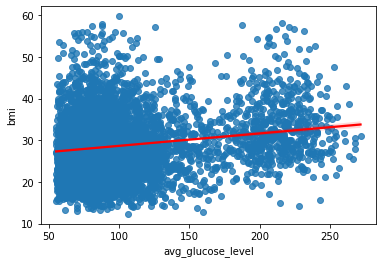

In [25]:
sns.regplot(x=df['avg_glucose_level'],y=df['bmi'], line_kws={"color": "red"})

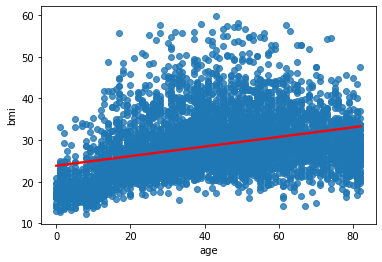

In [26]:
sns.regplot(x=df['age'],y=df['bmi'], line_kws={"color": "red"})

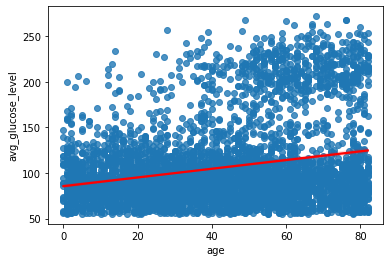

In [27]:
sns.regplot(x=df['age'],y=df['avg_glucose_level'], line_kws={"color": "red"})

In [28]:
df.head()

id  gender  age  hypertension  heart_disease  ever_married  \
0   9046    male   67             0              1             1   
1  51676  female   61             0              0             1   
2  31112    male   80             0              1             1   
3  60182  female   49             0              0             1   
4   1665  female   79             1              0             1   

       work_type residence_type  avg_glucose_level   bmi   smoking_status  \
0        private          urban             228.69  36.6  formerly-smoked   
1  self-employed          rural             202.21  29.1     never-smoked   
2        private          rural             105.92  32.5     never-smoked   
3        private          urban             171.23  34.4           smokes   
4  self-employed          rural             174.12  24.0     never-smoked   

   stroke  bmi_raw       age_bin avg_glucose_level_bin       bmi_bin  \
0       1     36.6  (65.0, 75.0]        (192.2, 271.7]  (34.2, 38.6]   
1       1      NaN  (57.0, 65.0]        (192.2, 271.7]  (28.2, 29.9]   
2       1     32.5  (75.0, 82.0]         (98.9, 108.5]  (31.8, 34.2]   
3       1     34.4  (45.0, 51.0]        (124.2, 192.2]  (34.2, 38.6]   
4       1     24.0  (75.0, 82.0]        (124.2, 192.2]  (22.6, 24.7]   

   bmi_zscore  avg_glucose_level_zscore  
0    1.048091                  2.706375  
1    0.036754                  2.121559  
2    0.495227                 -0.005028  
3    0.751432                  1.437358  
4   -0.650956                  1.501184

<h1> Some useful cross tables</h1>
    <P>For each cross tabulation, we have the counts and values as a percentage<P>

<h3>Bmi bins and stroke

In [29]:
ctab_bmi_stroke = pd.crosstab(df.bmi_bin,df.stroke)
ctab_bmi_stroke

stroke                        0   1
bmi_bin                            
(12.200000000000001, 19.8]  518   4
(19.8, 22.6]                489  14
(22.6, 24.7]                491  19
(24.7, 26.6]                498  21
(26.6, 28.2]                464  39
(28.2, 29.9]                487  33
(29.9, 31.8]                469  45
(31.8, 34.2]                471  26
(34.2, 38.6]                490  26
(38.6, 59.7]                484  22

In [30]:
(ctab_bmi_stroke.transpose() / ctab_bmi_stroke.sum(axis=1)).transpose()

stroke                             0         1
bmi_bin                                       
(12.200000000000001, 19.8]  0.992337  0.007663
(19.8, 22.6]                0.972167  0.027833
(22.6, 24.7]                0.962745  0.037255
(24.7, 26.6]                0.959538  0.040462
(26.6, 28.2]                0.922465  0.077535
(28.2, 29.9]                0.936538  0.063462
(29.9, 31.8]                0.912451  0.087549
(31.8, 34.2]                0.947686  0.052314
(34.2, 38.6]                0.949612  0.050388
(38.6, 59.7]                0.956522  0.043478

<h3>Ever_married and stroke

In [31]:
ctab_married_stroke = pd.crosstab(df.ever_married,df.stroke)
ctab_married_stroke

stroke           0    1
ever_married           
0             1728   29
1             3133  220

In [32]:
(ctab_married_stroke.transpose() / ctab_married_stroke.sum(axis=1)).transpose()

stroke               0         1
ever_married                    
0             0.983495  0.016505
1             0.934387  0.065613

<h3>Smoking and stroke

In [33]:
ctab_smoke_stroke = pd.crosstab(df.smoking_status,df.stroke)
ctab_smoke_stroke

stroke              0   1
smoking_status           
formerly-smoked   815  70
never-smoked     1802  90
smokes            747  42
unknown          1497  47

In [34]:
(ctab_smoke_stroke.transpose() / ctab_smoke_stroke.sum(axis=1)).transpose()

stroke                  0         1
smoking_status                     
formerly-smoked  0.920904  0.079096
never-smoked     0.952431  0.047569
smokes           0.946768  0.053232
unknown          0.969560  0.030440

<h3>Age and stroke

In [35]:
ctab_age_stroke = pd.crosstab(df.age_bin,df.stroke)
ctab_age_stroke

stroke          0   1
age_bin              
(-0.1, 11.0]  542   1
(11.0, 20.0]  481   1
(20.0, 30.0]  545   0
(30.0, 38.0]  526   3
(38.0, 45.0]  511   8
(45.0, 51.0]  437  14
(51.0, 57.0]  491  26
(57.0, 65.0]  519  40
(65.0, 75.0]  440  60
(75.0, 82.0]  369  96

In [36]:
(ctab_age_stroke.transpose() / ctab_age_stroke.sum(axis=1)).transpose()

stroke               0         1
age_bin                         
(-0.1, 11.0]  0.998158  0.001842
(11.0, 20.0]  0.997925  0.002075
(20.0, 30.0]  1.000000  0.000000
(30.0, 38.0]  0.994329  0.005671
(38.0, 45.0]  0.984586  0.015414
(45.0, 51.0]  0.968958  0.031042
(51.0, 57.0]  0.949710  0.050290
(57.0, 65.0]  0.928444  0.071556
(65.0, 75.0]  0.880000  0.120000
(75.0, 82.0]  0.793548  0.206452

<h3>hypertension and stroke

In [37]:
ctab_hyper_stroke = pd.crosstab(df.hypertension,df.stroke)
ctab_hyper_stroke

stroke           0    1
hypertension           
0             4429  183
1              432   66

In [38]:
(ctab_hyper_stroke.transpose() / ctab_hyper_stroke.sum(axis=1)).transpose()

stroke               0         1
hypertension                    
0             0.960321  0.039679
1             0.867470  0.132530

<h3>heart disease and stroke

In [39]:
ctab_heart_disease_stroke = pd.crosstab(df.heart_disease,df.stroke)
ctab_heart_disease_stroke

stroke            0    1
heart_disease           
0              4632  202
1               229   47

In [40]:
(ctab_heart_disease_stroke.transpose() / ctab_heart_disease_stroke.sum(axis=1)).transpose()

stroke                0         1
heart_disease                    
0              0.958213  0.041787
1              0.829710  0.170290

<h3>Glucose and stroke

In [41]:
ctab_glucose_disease_stroke = pd.crosstab(df.avg_glucose_level_bin,df.stroke)
ctab_glucose_disease_stroke

stroke                   0   1
avg_glucose_level_bin         
(55.0, 65.8]           492  19
(65.8, 73.8]           490  22
(73.8, 80.0]           488  22
(80.0, 85.6]           498  14
(85.6, 91.9]           494  16
(91.9, 98.9]           493  18
(98.9, 108.5]          492  19
(108.5, 124.2]         493  19
(124.2, 192.2]         478  32
(192.2, 271.7]         443  68

In [42]:
(ctab_glucose_disease_stroke.transpose() / ctab_glucose_disease_stroke.sum(axis=1)).transpose()

stroke                        0         1
avg_glucose_level_bin                    
(55.0, 65.8]           0.962818  0.037182
(65.8, 73.8]           0.957031  0.042969
(73.8, 80.0]           0.956863  0.043137
(80.0, 85.6]           0.972656  0.027344
(85.6, 91.9]           0.968627  0.031373
(91.9, 98.9]           0.964775  0.035225
(98.9, 108.5]          0.962818  0.037182
(108.5, 124.2]         0.962891  0.037109
(124.2, 192.2]         0.937255  0.062745
(192.2, 271.7]         0.866928  0.133072

In [43]:
df.head()

id  gender  age  hypertension  heart_disease  ever_married  \
0   9046    male   67             0              1             1   
1  51676  female   61             0              0             1   
2  31112    male   80             0              1             1   
3  60182  female   49             0              0             1   
4   1665  female   79             1              0             1   

       work_type residence_type  avg_glucose_level   bmi   smoking_status  \
0        private          urban             228.69  36.6  formerly-smoked   
1  self-employed          rural             202.21  29.1     never-smoked   
2        private          rural             105.92  32.5     never-smoked   
3        private          urban             171.23  34.4           smokes   
4  self-employed          rural             174.12  24.0     never-smoked   

   stroke  bmi_raw       age_bin avg_glucose_level_bin       bmi_bin  \
0       1     36.6  (65.0, 75.0]        (192.2, 271.7]  (34.2, 38.6]   
1       1      NaN  (57.0, 65.0]        (192.2, 271.7]  (28.2, 29.9]   
2       1     32.5  (75.0, 82.0]         (98.9, 108.5]  (31.8, 34.2]   
3       1     34.4  (45.0, 51.0]        (124.2, 192.2]  (34.2, 38.6]   
4       1     24.0  (75.0, 82.0]        (124.2, 192.2]  (22.6, 24.7]   

   bmi_zscore  avg_glucose_level_zscore  
0    1.048091                  2.706375  
1    0.036754                  2.121559  
2    0.495227                 -0.005028  
3    0.751432                  1.437358  
4   -0.650956                  1.501184

In [44]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)
print(df)

         id  gender  age  hypertension  heart_disease  ever_married  \
0      9046    male   67             0              1             1   
1     51676  female   61             0              0             1   
2     31112    male   80             0              1             1   
3     60182  female   49             0              0             1   
4      1665  female   79             1              0             1   
5     56669    male   81             0              0             1   
6     53882    male   74             1              1             1   
7     10434  female   69             0              0             0   
8     27419  female   59             0              0             1   
9     60491  female   78             0              0             1   
10    12109  female   81             1              0             1   
11    12095  female   61             0              1             1   
12    12175  female   54             0              0             1   
13    

In [45]:
df.describe()

id          age  hypertension  heart_disease  ever_married  \
count   5110.000000  5110.000000   5110.000000    5110.000000   5110.000000   
mean   36517.829354    43.226614      0.097456       0.054012      0.656164   
std    21161.721625    22.612731      0.296607       0.226063      0.475034   
min       67.000000     0.000000      0.000000       0.000000      0.000000   
25%    17741.250000    25.000000      0.000000       0.000000      0.000000   
50%    36932.000000    45.000000      0.000000       0.000000      1.000000   
75%    54682.000000    61.000000      0.000000       0.000000      1.000000   
max    72940.000000    82.000000      1.000000       1.000000      1.000000   

       avg_glucose_level          bmi       stroke      bmi_raw    bmi_zscore  \
count        5110.000000  5110.000000  5110.000000  4892.000000  5.110000e+03   
mean          106.147677    28.827436     0.048728    28.799714 -3.003468e-16   
std            45.283560     7.416649     0.215320     7.541793  1.000098e+00   
min            55.120000    12.300000     0.000000    12.300000 -2.228642e+00   
25%            77.245000    23.700000     0.000000    23.500000 -6.914090e-01   
50%            91.885000    28.200000     0.000000    28.000000 -8.460664e-02   
75%           114.090000    32.800000     0.000000    33.000000  5.356802e-01   
max           271.740000    59.700000     1.000000    59.700000  4.163010e+00   

       avg_glucose_level_zscore  
count              5.110000e+03  
mean               1.001156e-16  
std                1.000098e+00  
min               -1.126958e+00  
25%               -6.383223e-01  
50%               -3.149945e-01  
75%                1.754080e-01  
max                3.657145e+00

# HeatMap showing Correlation of all variables

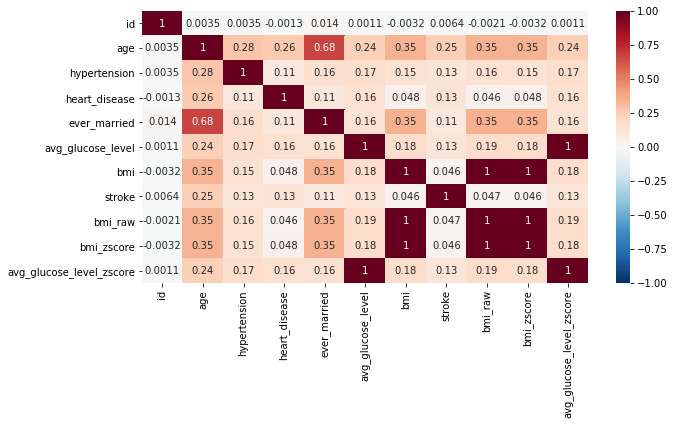

In [46]:
datavis = df.corr()
plt.figure(figsize=(10,5))
sns.heatmap(datavis, annot=True, linewidths=0, vmin=-1, cmap="RdBu_r")
plt.show()

# Pairplot displaying all possible graph data

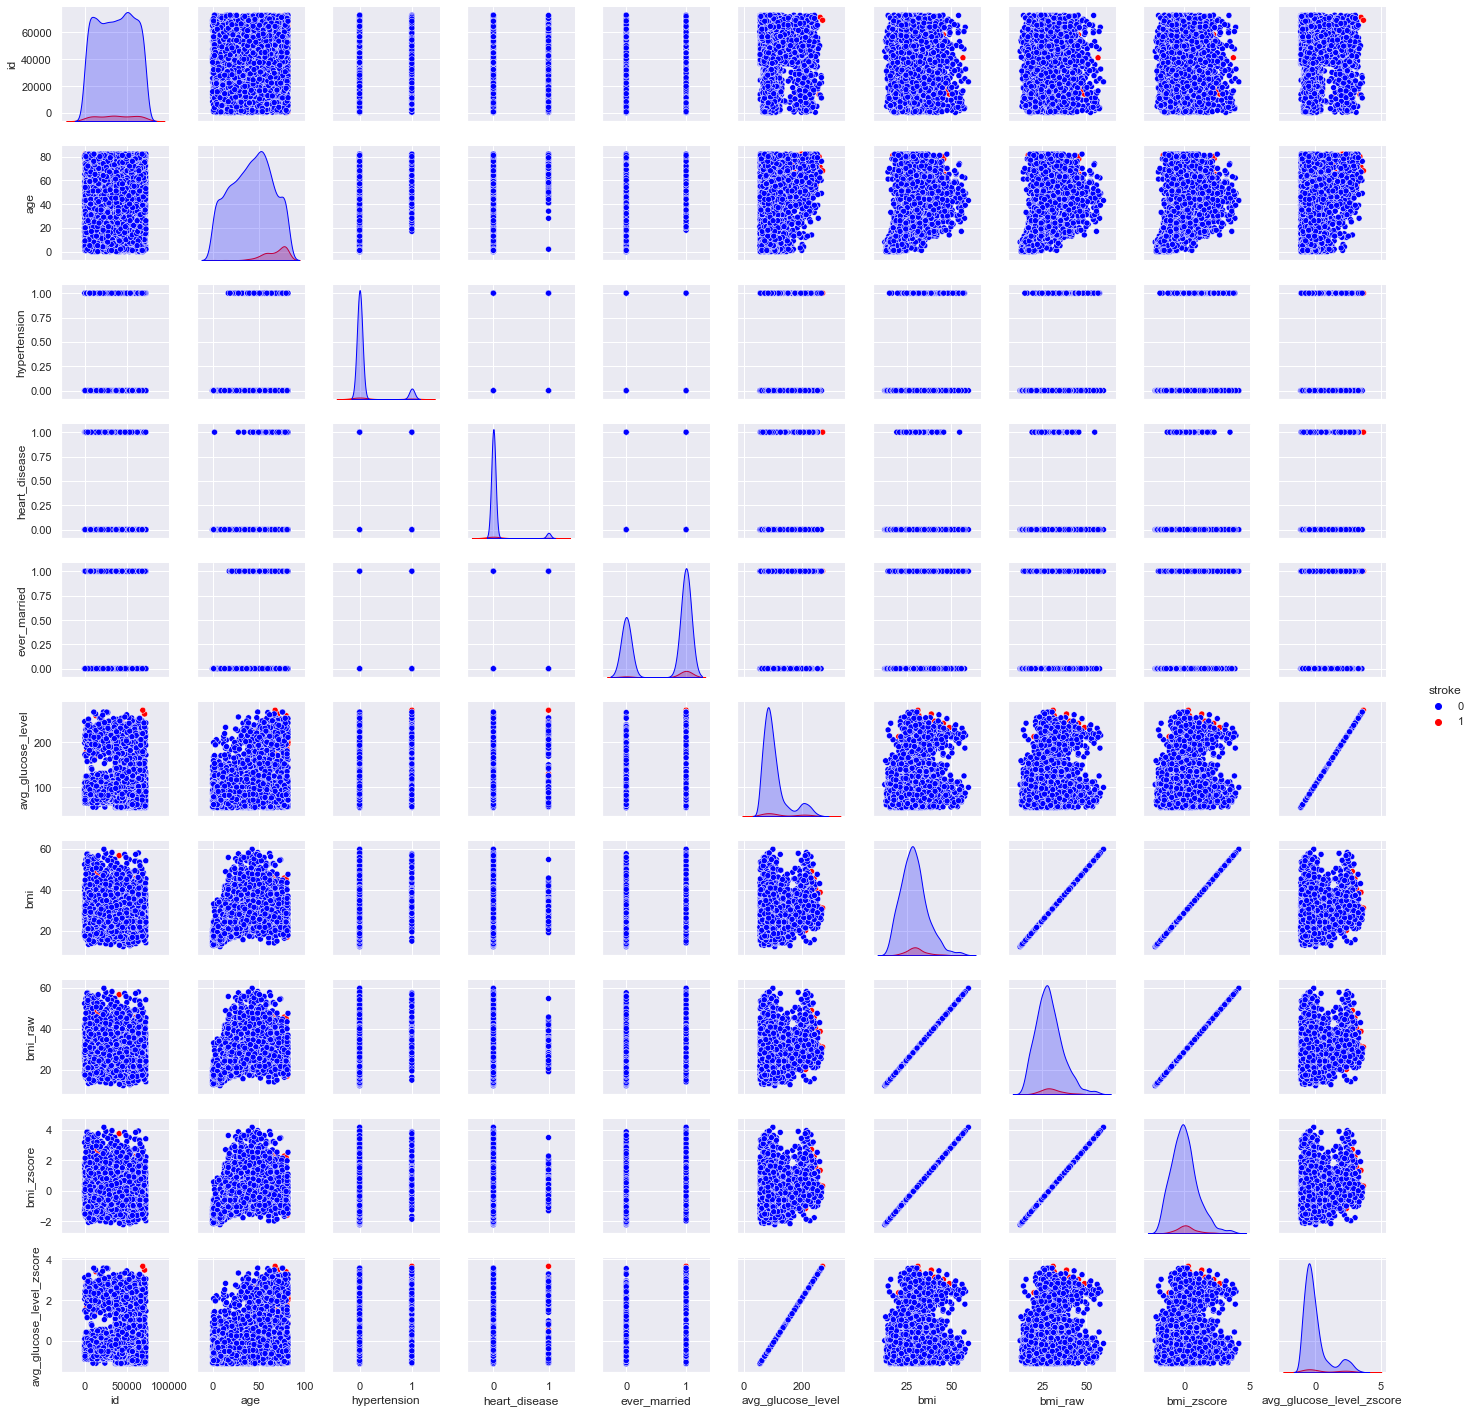

In [56]:
sns.pairplot(df,palette={"blue","red"}, hue="stroke", height=2)
plt.show()


# Smoking Status and Stroke 

With the dataset smoking status and strokes which is indicated in green indicate that the correlation and factor of smoking is indeterminate to causing a stroke. 
The histogram gives the count of individuals in 4 categories which have either smoked, never smoked or has smoked with one category being unknown.

In [63]:
colorpallete = {"1.0":"red","0.0":"gray"}
df["stroke"]
plt = px.histogram(df, x="smoking_status",color="stroke",color_discrete_map=colorpallete)

plt.show()

# Age and Stroke correlation

With the histogram age and stroke are our primary variables starting from birth to 90 years of age.
Within the histogram we can postulate that age is a considerable factor in causing strokes, as it implies with age that the older an individual the higher the chance of having a stroke.

In [66]:
df["stroke"]
fig = px.histogram(df, x="age",color="stroke",color_discrete_map=colorpallete)

fig.show()

In [60]:
df['age_bin'] = pd.cut(x=df['age'], bins=[20,30,40,50,60,70,80,90])
print("total entires in each bin is:\n", df['age_bin'].value_counts())

total entires in each bin is:
 (50, 60]    823
(40, 50]    739
(30, 40]    674
(70, 80]    594
(60, 70]    594
(20, 30]    545
(80, 90]    116
Name: age_bin, dtype: int64


In [59]:
df['age_decades'] = pd.cut(x=df['age'], bins=[20, 30, 40, 50, 60,70,80,90], labels=['20-29','30-39', '40-49','50-59','60-69','70-79','80-90'])
df.groupby(["age_decades","stroke"])["age"].count()

age_decades  stroke
20-29        0         545
             1           0
30-39        0         668
             1           6
40-49        0         724
             1          15
50-59        0         774
             1          49
60-69        0         545
             1          49
70-79        0         489
             1         105
80-90        0          93
             1          23
Name: age, dtype: int64

# Binned Age To visualise stroke

In [64]:
df["stroke"] = df["stroke"]
fig = px.histogram(df, x="age_decades",color="stroke",color_discrete_map=colorpallete)
fig.show()

# Examination of Hypertension and stroke 

Text(0, 0.5, 'Count')

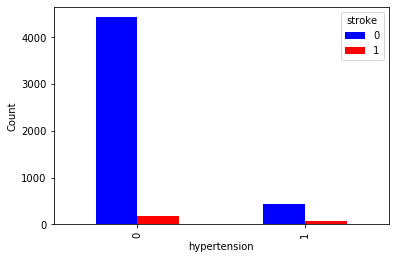

In [51]:
bar = pd.crosstab(df["hypertension"], df["stroke"]).plot(kind="bar", color=["blue", "red"]);
bar.set_ylabel('Count')

# Heart Disease and Stroke

In [52]:
df["stroke"]
fig = px.histogram(df, x="heart_disease",color="stroke",color_discrete_map=colorpallete)
fig.show()

# Age and Glucose correlating to stroke

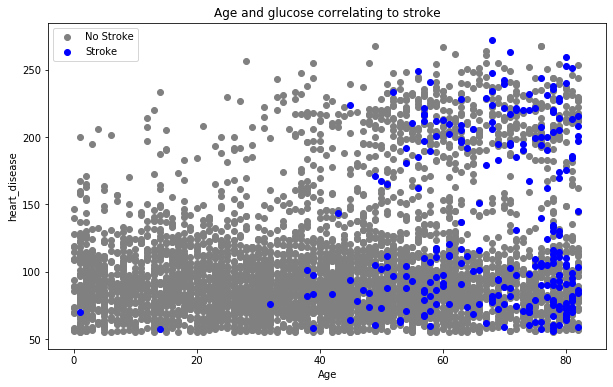

In [53]:
from matplotlib import pyplot as plt
plt.figure(figsize=(10,6))

plt.scatter(df.age[df.stroke==0], df.avg_glucose_level[df.stroke==0], c="grey")

plt.scatter(df.age[df.stroke==1], df.avg_glucose_level[df.stroke==1], c="blue")

plt.title("Age and glucose correlating to stroke")
plt.xlabel("Age")
plt.legend(["No Stroke", "Stroke"])
plt.ylabel("heart_disease");
plt.show()

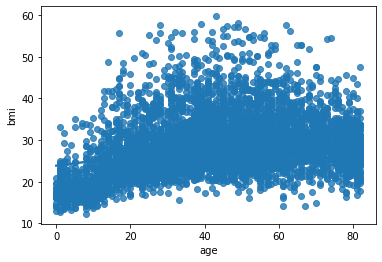

In [54]:
sns.regplot(x=df['age'],y=df['bmi'])

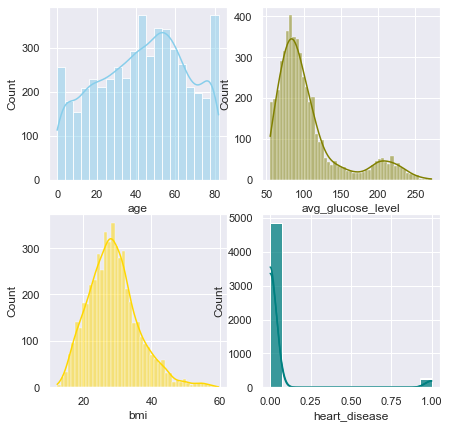

In [100]:
sns.set(style="darkgrid")

fig, axs = plt.subplots(2, 2, figsize=(7, 7))

sns.histplot(data=df, x="age", kde=True, color="skyblue", ax=axs[0, 0])
sns.histplot(data=df, x="avg_glucose_level", kde=True, color="olive", ax=axs[0, 1])
sns.histplot(data=df, x="bmi", kde=True, color="gold", ax=axs[1, 0])
sns.histplot(data=df, x="heart_disease", kde=True, color="teal", ax=axs[1, 1])
sns.histplot(data=df, x="stroke", kde=True, color="teal", ax=axs[1, 1])

plt.show()

In [69]:
df["stroke"]
fig = px.histogram(df, x="age",color="smoking_status",color_discrete_map=colorpallete)

fig.show()

# Graph indicates that females have a higher number of strokes than men

In [70]:
colorpallete = {"1.0":"red","0.0":"gray"}
df["stroke"]
plt = px.histogram(df, x="gender",color="stroke",color_discrete_map=colorpallete)

plt.show()